# **RMSprop (Root Mean Square Propagation)**

### **1. Introduction to RMSprop**

RMSprop is an **adaptive learning rate optimization algorithm** designed to speed up training and improve convergence, especially in deep neural networks. It was proposed by Geoffrey Hinton in his Coursera lectures.

#### **Why Do We Need RMSprop?**
- Vanilla Gradient Descent struggles with varying learning rates in different directions.

- In deep learning, gradients can be too large (exploding gradients) or too small (vanishing gradients).

- Momentum methods help with speed but don't adapt learning rates per parameter.

- RMSprop dynamically adjusts the learning rate for each parameter using a moving average of squared gradients, preventing instability.

---

### **2. The Intuition Behind RMSprop**
- Standard gradient descent uses a single learning rate alpha (α) for all parameters.
- **Problem:** Some parameters may need larger updates, while others may need smaller ones.
- **Solution:** RMSprop scales the learning rate per parameter based on its past gradients.

**Key Ideas:**
- ✅ Uses a **moving average of squared gradients** to normalize updates.
- ✅ **Reduces step size for large gradients**, preventing divergence.
- ✅ **Increases step size for small gradients**, avoiding slow convergence.
- ✅ **Well-suited for non-stationary problems** (changing loss landscapes).

---

### **3. Mathematical Formulation of RMSprop**

Let's define:

- $\theta_t$: Model parameters at iteration $t$.
- $\nabla J(\theta_t)$: Gradient of the loss function.
- $\alpha$: Learning rate.
- $\beta$: Decay factor (smoothing parameter, e.g., 0.9).
- $\epsilon$: Small constant to avoid division by zero (e.g., 10^{−8}).
- E[g^2]_t: Exponentially weighted moving average of squared gradients.

**Step 1: Compute the Gradient**
$$g_t = \nabla J(\theta_t)$$

**Step 2: Update the Moving Average of Squared Gradients**
$$E[g^2]_t = \beta E[g^2]_{t-1} + (1 - \beta) g_t^2$$

where:
- $E[g^2]_{t-1}$ keeps track of past gradient magnitudes.
- $\beta$ determines how much past gradients influence the update.

**Step 3: Update the Parameters**
$$\theta_{t+1} = \theta_t - \frac{\alpha}{\sqrt{E[g^2]_t + \epsilon}} \cdot g_t$$

- Dividing by $\sqrt{E[g^2]_t + \epsilon}$ scales the learning rate (i.e., normalizes the step size).
- Large gradients $\rightarrow$ smaller updates.
- Small gradients $\rightarrow$ larger updates.

---

### **4. How RMSprop Helps**

**Scenario 1: Adjusting Learning Rates Per Parameter**
- Some parameters may have high variance in gradients.
- RMSprop scales learning rates per parameter, avoiding instability.

**Scenario 2: Handling Vanishing and Exploding Gradients**
- In deep networks, **gradients may vanish (become too small) or explode (become too large)**.
- RMSprop **dampens large updates** and **boosts small updates**, stabilizing training.

**Scenario 3: Faster Convergence in Non-Convex Problems**
- **Adaptive learning rates** help avoid poor local minima.
- Works well in complex landscapes like deep neural networks.

In [172]:
import numpy as np
import matplotlib.pyplot as plt

In [173]:
# Example function: f(x) = x^2 (simple quadratic loss)
def gradient(x):
    return 2*x  # Derivative of f(x) = x^2

In [174]:
# Initialize variables
x_init = 4  # Start at x=4
alpha = 0.1  # Learning rate
beta = 0.9  # Decay rate for squared gradient moving average

## **Standard Gradient Descent**

In [175]:
# Run standard gradient descent for comparison
x = x_init

x_history_standard = [x]

for _ in range(50):
    grad = gradient(x)
    x = x - alpha * grad
    x_history_standard.append(x)

## **Momentum-based Gradient Descent**

In [176]:
# Run gradient descent with momentum
x = x_init  # Start at x=10
v = 0  # Initialize velocity

x_history_momentum = [x]

for _ in range(50):
    grad = gradient(x)
    v = beta * v + (1 - beta) * grad  # Update velocity
    x = x - alpha * v  # Update x position
    x_history_momentum.append(x)

## **RMSprop**

In [177]:
# Run RMSprop for 50 iterations
x = x_init  # Start at x=10
epsilon = 1e-7  # Small constant to avoid division by zero
Eg2 = 0  # Initialize squared gradient moving average

x_history_rmsprop = [x]

for _ in range(50):
    grad = gradient(x)  # Compute gradient
    Eg2 = beta * Eg2 + (1 - beta) * grad**2  # Update moving average
    x = x - (alpha / (np.sqrt(Eg2) + epsilon)) * grad  # Update parameter
    x_history_rmsprop.append(x)

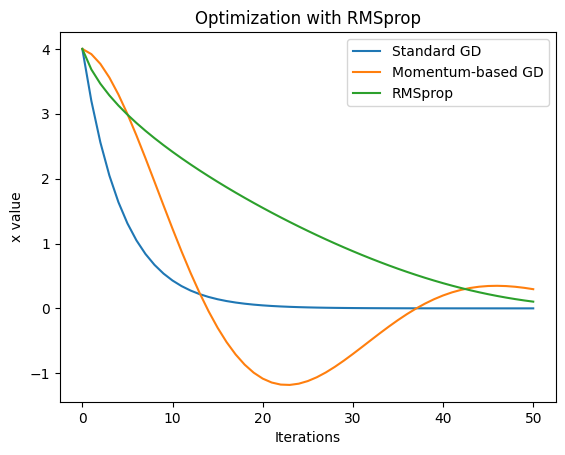

In [178]:
# Plot results
plt.plot(x_history_standard, label="Standard GD")
plt.plot(x_history_momentum, label="Momentum-based GD")
plt.plot(x_history_rmsprop, label="RMSprop")

plt.xlabel("Iterations")
plt.ylabel("x value")
plt.title("Optimization with RMSprop")
plt.legend()
plt.show()